# Síntesis de señales

## Alumno: Matías Carbajal.

Señal analogica: La variable independiente (normalmente el tiempo) es un número real no cuantizado.
Esto significa que la señal tiene un valor medible en cada instante de tiempo.
Ejemplo: la salida de un micrófono.


Señal digital: Es una señal discreta en el tiempo, es decir, su variable independiente está cuantizada: solo tiene valor en ciertos instantes (por ejemplo, índices enteros 
n=0,1,2,…).
Se representa como una secuencia de números 
x[n]
x[n], donde cada número corresponde al valor de la señal en un instante particular.

### 1)

Sintetizar y graficar:

a.Una señal sinusoidal de 2KHz.

b.Misma señal amplificada y desfazada en π/2.

c.Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.

d.Señal anterior recortada al 75% de su amplitud.

e.Una señal cuadrada de 4KHz.

f.Un pulso rectangular de 10ms.

g.En cada caso indique tiempo entre muestras, número de muestras y potencia o energía según corresponda.


## Importaciones y parametros.

In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
N = 250
f = 2000
fs = 50000
fsquare = 4000
t = np.arange(N) / fs

In [2]:
def plot_signal(t, sig, title):
    plt.figure(figsize=(6, 3))
    plt.plot(t, sig)
    plt.title(title)
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud [V]")
    plt.grid(True)
    plt.show()

## Síntesis de señales.

In [3]:
# Señales
s1 = np.sin(2 * np.pi * f * t)
s2 = 2 * np.sin(2 * np.pi * f * t + np.pi / 2)
s3 = np.sin(2 * np.pi * (f / 2) * t)
s4 = s1 * s3
sq = signal.square(2 * np.pi * fsquare * t)
A = np.max(np.abs(s4)) * 0.75
s5 = np.clip(s4, a_min=-A, a_max=A)


### Pulso rectangular.

In [4]:
# Pulso rectangular de 10 ms
Tp = 0.01                 # duración
N_pulso = int(Tp * fs)    # muestras del pulso
N_total = 1000            # total de muestras
t_pulso = np.arange(N_total)/fs

pulso = np.zeros(N_total)
pulso[:N_pulso] = 1       # pulso de 10 ms

# Energía del pulso
E_pulso = np.sum(pulso**2)
print(f"Pulso rectangular 10 ms: N = {N_total}, E = {E_pulso}")


Pulso rectangular 10 ms: N = 1000, E = 500.0


### Grafica de las señales.

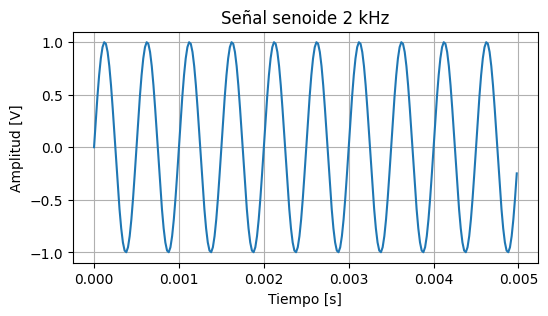

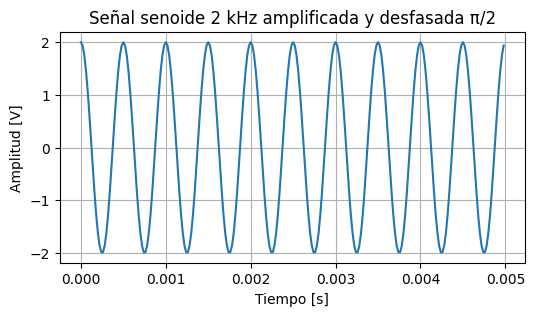

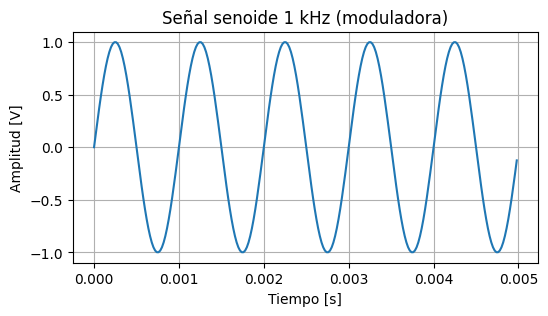

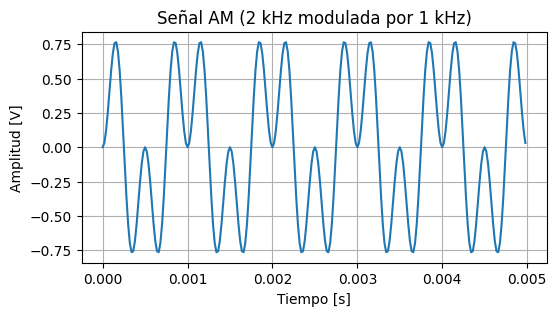

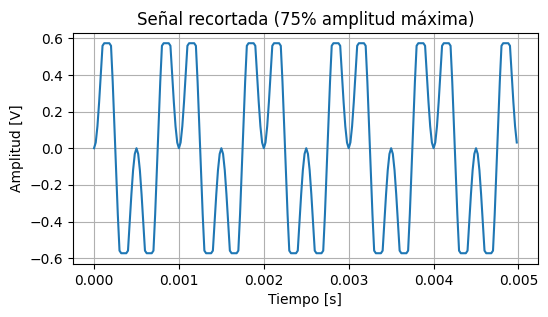

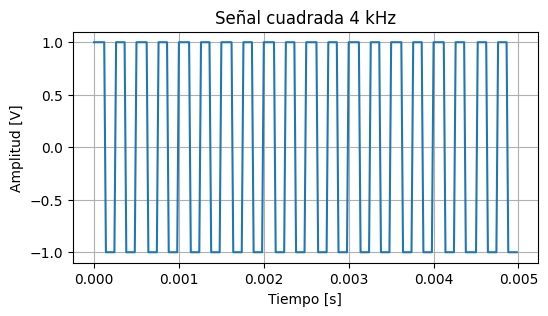

In [5]:
plot_signal(t, s1, "Señal senoide 2 kHz")
plot_signal(t, s2, "Señal senoide 2 kHz amplificada y desfasada π/2")
plot_signal(t, s3, "Señal senoide 1 kHz (moduladora)")
plot_signal(t, s4, "Señal AM (2 kHz modulada por 1 kHz)")
plot_signal(t, s5, "Señal recortada (75% amplitud máxima)")
plot_signal(t, sq, "Señal cuadrada 4 kHz")


# 2) Verificar ortogonalidad.

In [6]:
signals = [s2, s3, s4, sq]
names = ["s2", "s3", "s4", "sq"]

print("\nVerificación de ortogonalidad con s1:")
umbral = 1e-10
for sig, name in zip(signals, names):
    inner = np.sum(s1 * sig)
    if abs(inner) < umbral:
        print(f"s1 y {name} → ORTOGONAL (producto interno ≈ {inner:.2e})")
    else:
        print(f"s1 y {name} → NO ORTOGONAL (producto interno = {inner:.4f})")



Verificación de ortogonalidad con s1:
s1 y s2 → ORTOGONAL (producto interno ≈ -1.61e-13)
s1 y s3 → ORTOGONAL (producto interno ≈ 4.80e-14)
s1 y s4 → ORTOGONAL (producto interno ≈ 2.49e-14)
s1 y sq → NO ORTOGONAL (producto interno = 9.3906)


# 3) Autocorrelacion y correlacion entre las señales

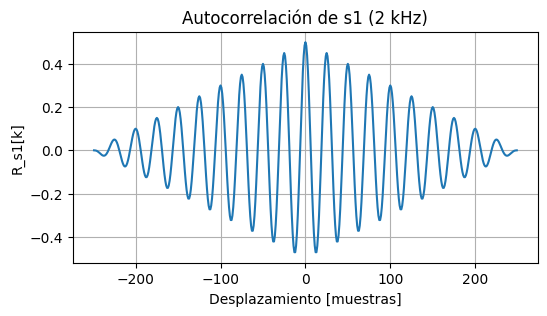

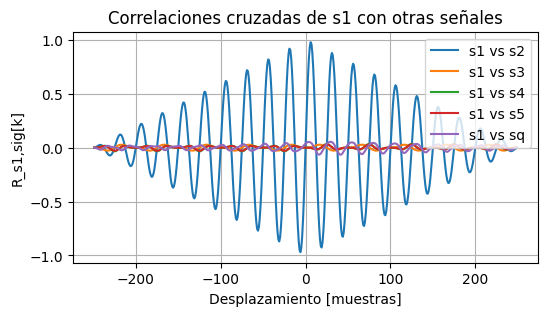

In [7]:
R_s1 = np.correlate(s1, s1, mode='full') / len(s1)
lags = np.arange(-len(s1) + 1, len(s1))
plt.figure(figsize=(6, 3))
plt.plot(lags, R_s1)
plt.title("Autocorrelación de s1 (2 kHz)")
plt.xlabel("Desplazamiento [muestras]")
plt.ylabel("R_s1[k]")
plt.grid(True)
plt.show()

signals = [s2, s3, s4, s5, sq]
names = ["s2", "s3", "s4", "s5", "sq"]

plt.figure(figsize=(6, 3))
for sig, name in zip(signals, names):
    R = np.correlate(s1, sig, mode="full") / len(s1)
    plt.plot(np.arange(-len(s1) + 1, len(s1)), R, label=f"s1 vs {name}")
plt.title("Correlaciones cruzadas de s1 con otras señales")
plt.xlabel("Desplazamiento [muestras]")
plt.ylabel("R_s1,sig[k]")
plt.grid(True)
plt.legend()
plt.show()


# 4) Demostracion de la identidad trigonométrica.

[Abrir PDF](identidad_trigonometrica-1.pdf)


### Demostracion de la identidad con seañales senoidales.

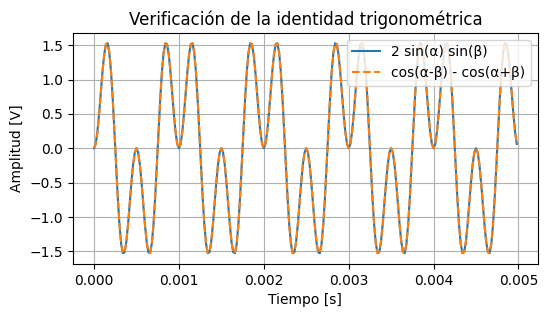

In [8]:
alpha = 2 * np.pi * f * t
beta = 2 * np.pi * (f / 2) * t
lhs = 2 * np.sin(alpha) * np.sin(beta)
rhs = np.cos(alpha - beta) - np.cos(alpha + beta)

plt.figure(figsize=(6, 3))
plt.plot(t, lhs, label="2 sin(α) sin(β)")
plt.plot(t, rhs, '--', label="cos(α-β) - cos(α+β)")
plt.title("Verificación de la identidad trigonométrica")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)
plt.legend()
plt.show()

## Conclusiones:

En en este trabajo semanal si utilize IA (chatgpt) ya que es mi primer acercamiento a python por lo tanto no tenia mucha idea de como funcionan las instrucciones, funciones,estructuras, todo esto lo use para el desarrollo de codigo.


En cuanto lo aprendido, entendi muchas cosas a la hora de realizar este tp, intentado sustentar todo con la teoria explicada en clase y con el libro, como el teorema de nyquist, frecuencia de muestreo, numero de muestras.